<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/calendar_heatmap/calendar_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calendar heatmaps

Vamos mostrar um exemplos de como fazer um mapa de calor por dia do calendário, do tipo que é mostrado no GitHub.
Vamos utilizar o [calplot](https://calplot.readthedocs.io/en/latest/), que foi feito baseado no [calmap](https://github.com/martijnvermaat/calmap). O calplot traz novos argumentos que tornam mais fácil a customização dos gráficos. Também foi feita uma refatoração do código.

Em [Time Series Data Visualization using Heatmaps in Python](https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/) podemos encontrar explicações do que é um mapa e calor, um calendário com mapa de calor, o Calendar heatmap, e também quando esté tipo de gráfico pode ser utilizado.

# Instação

Para instalar a última versão:

In [1]:
!pip install calplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot

# Dados

**UCI machine learning repository**

Online Retail Data Set

Mais informações [aqui](https://archive.ics.uci.edu/ml/datasets/online+retail#).

In [3]:
# Leitura dos dados
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
            
online = pd.read_excel(file_path)

# Mostra primeiras linhas
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Filtrando os dados
online = online[online.UnitPrice > 0]
online = online[online.Quantity > 0]
online = online[~online.CustomerID.isna()]

In [5]:
# criando coluna de data
online['Date'] = pd.to_datetime(online['InvoiceDate'].dt.date)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [6]:
invoice_by_date = online.groupby('Date').agg(count_invoice = ('InvoiceNo','nunique'))
invoice_by_date.head()

,count_invoice
Date,
2010-12-01,121
2010-12-02,137
2010-12-03,57
2010-12-05,87
2010-12-06,94


# Exemplos

## Exemplo 1

Exemplo apresentado na [documentação](https://github.com/tomkwok/calplot). Como entrada da função só precisamos de uma série Pandas Series com DatetimeIndex.

(<Figure size 900x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07f9a4cd0>,
       dtype=object))

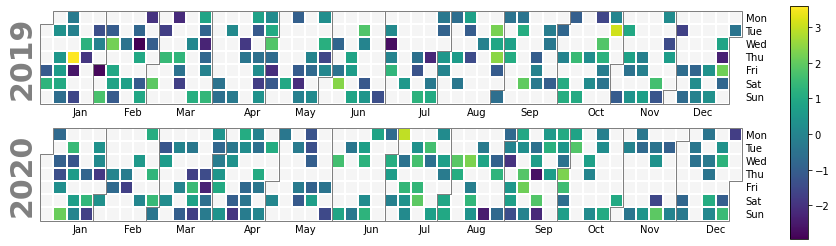

In [7]:
np.random.seed(sum(map(ord, 'calplot')))
all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events)

É fácil de utilizar. E também fácil para alterar alguns parâmetros. Vamos mostrar isto em alguns exemplos abaixo.

## Exemplo 2

O primeiro exemplo pode ficar melhor com outra paleta de cores, de forma que fica mais fácil diferenciar os valores positivos dos negativos.

- cmap (Outras paletas de cor [aqui](https://matplotlib.org/stable/tutorials/colors/colormaps.html ).

(<Figure size 900x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07266e390>,
       dtype=object))

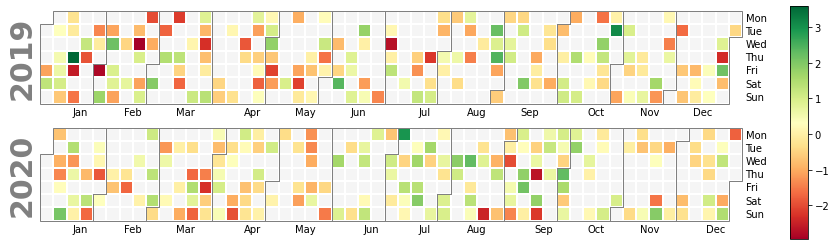

In [8]:
np.random.seed(sum(map(ord, 'calplot')))
all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events,
                cmap='RdYlGn')

## Exemplo 3

Vamos utilizar os dados **Online Retail Data Set**.

- Meses e dias da semana em  português
- Título
- Espessura da linha que divide os dias e meses
- Tamanho da figura
- cmap (Outras paletas de cor [aqui](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

(<Figure size 1296x360 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07ee63a50>,
       dtype=object))

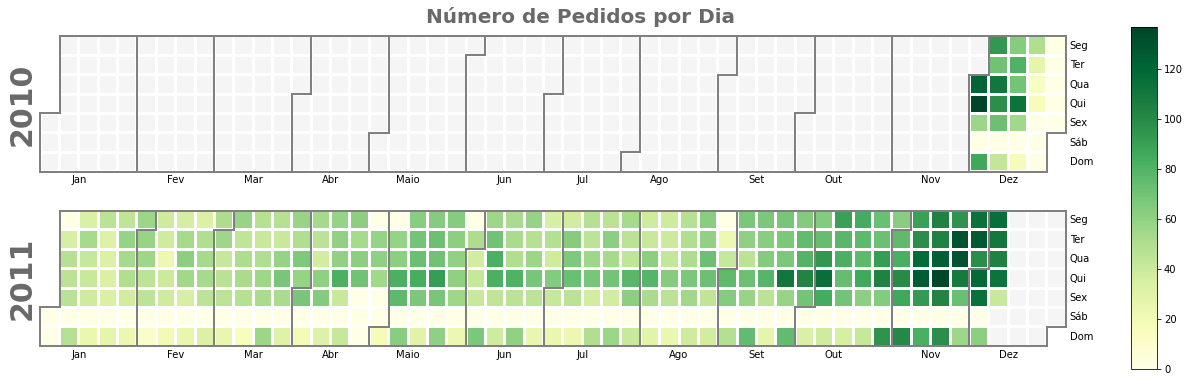

In [9]:
monthlabels_pt=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
daylabels_pt=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']


calplot.calplot(invoice_by_date['count_invoice'],
                cmap='YlGn',
                daylabels=daylabels_pt,
                monthlabels=monthlabels_pt,
                yearlabel_kws={'color': 'dimgray'},
                suptitle="Número de Pedidos por Dia",
                suptitle_kws={'fontsize':20,
                              'fontweight':'bold',
                              'color':'dimgray'},
                colorbar=True,
                linewidth=2,
                figsize=(18,5)
                )

## Exemplo 4

Quando retirei a barra de cores foi necessário ajustar a altura

- Texto
- Como preencher valores nulos
- Cor da linha que divide os meses
- Retirada da barra e cores

(<Figure size 1296x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd072675410>,
       dtype=object))

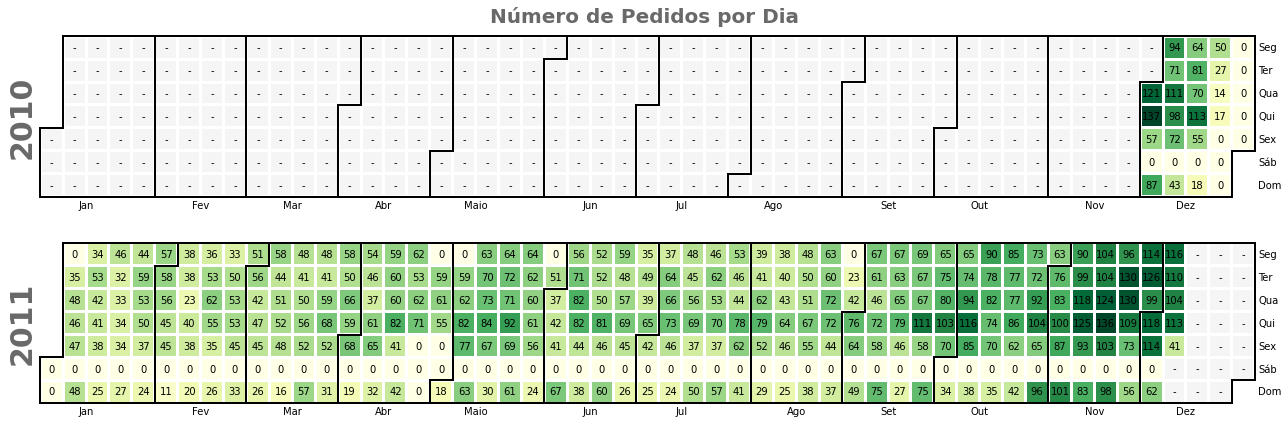

In [10]:
monthlabels_pt=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
daylabels_pt=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']

calplot.calplot(invoice_by_date['count_invoice'],
                cmap='YlGn',
                daylabels=daylabels_pt,
                monthlabels=monthlabels_pt,
                yearlabel_kws={'color': 'dimgray'},
                suptitle="Número de Pedidos por Dia",
                suptitle_kws={'fontsize':20,
                              'fontweight':'bold',
                              'color':'dimgray'},
                colorbar=False,
                textformat='{:.0f}',
                textfiller='-',
                linewidth=2,
                edgecolor='black', # Color of the lines that will divide months.
                figsize=(18,6)
                )

## Exemplo 5

- paleta de cores a partir de uma cor escolhido (bom para ser utilizado para seguir o padrão de cores de uma apresentação.)
- sem a linha que divide os meses

(<Figure size 1296x360 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07e0b8310>,
       dtype=object))

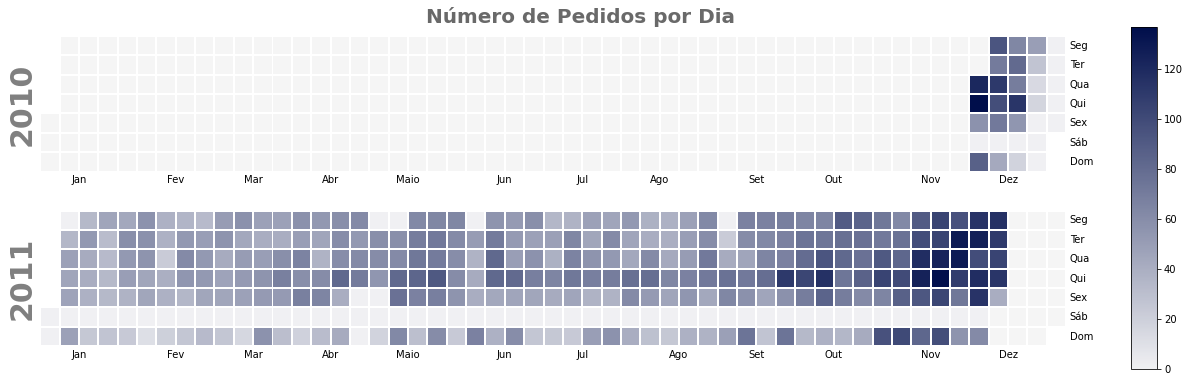

In [11]:
# cor hex

monthlabels_pt=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
daylabels_pt=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
colors = plt.get_cmap(sns.light_palette('#000E4B', reverse=False, as_cmap=True))


calplot.calplot(invoice_by_date['count_invoice'],
                cmap=colors,
                daylabels=daylabels_pt,
                monthlabels=monthlabels_pt,
                suptitle="Número de Pedidos por Dia",
                suptitle_kws={'fontsize':20,
                              'fontweight':'bold',
                              'color':'dimgray'},
                colorbar=True,
                edgecolor=None, # Color of the lines that will divide months
                figsize=(18,5)
                )

(<Figure size 1296x360 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07b0a02d0>,
       dtype=object))

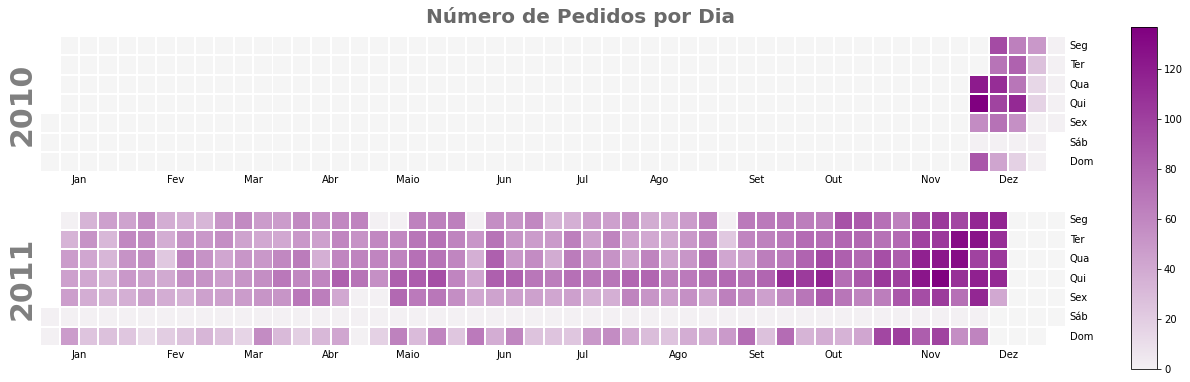

In [12]:
# nome da cor
monthlabels_pt=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
daylabels_pt=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
colors = plt.get_cmap(sns.light_palette('purple', reverse=False, as_cmap=True))


calplot.calplot(invoice_by_date['count_invoice'],
                cmap=colors,
                daylabels=daylabels_pt,
                monthlabels=monthlabels_pt,
                suptitle="Número de Pedidos por Dia",
                suptitle_kws={'fontsize':20,
                              'fontweight':'bold',
                              'color':'dimgray'},
                colorbar=True,
                edgecolor=None, # Color of the lines that will divide months
                figsize=(18,5)
                )

# Contruir uma função

- Quando encontrar o padrão que você deseja utilizar, pode ser útil construir uma função. Como por exemplo a mostrada a baixo

In [13]:
def plot_calmap(pd_series, color,fig_size = (18,5)):
  '''
  pd_series: Série do Pandas com DatetimeIndex 
  color: cor utilizada do gráfico, pode ser o nome ou o código hexadecimal, exemplo: 'red', '#0f4a56'
  fig_size: tamanho da figura
  '''

  monthlabels_pt=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
  daylabels_pt=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']

  colors = plt.get_cmap(sns.light_palette(color, reverse=False, as_cmap=True))


  calplot.calplot(pd_series,
                  cmap=colors,
                  daylabels=daylabels_pt,
                  monthlabels=monthlabels_pt,
                  yearlabel_kws={'color': 'dimgray'},
                  suptitle="Número de Pedidos por Dia",
                  suptitle_kws={'fontsize':20,
                              'fontweight':'bold',
                              'color':'dimgray'},
                  colorbar=True,
                  linewidth=1.5,
                  figsize=fig_size
                  )



**Obs.:** Se for utilizar para mais de uma variável pode ser bom não colocar o título, ou também passar o título como uma variável da função.

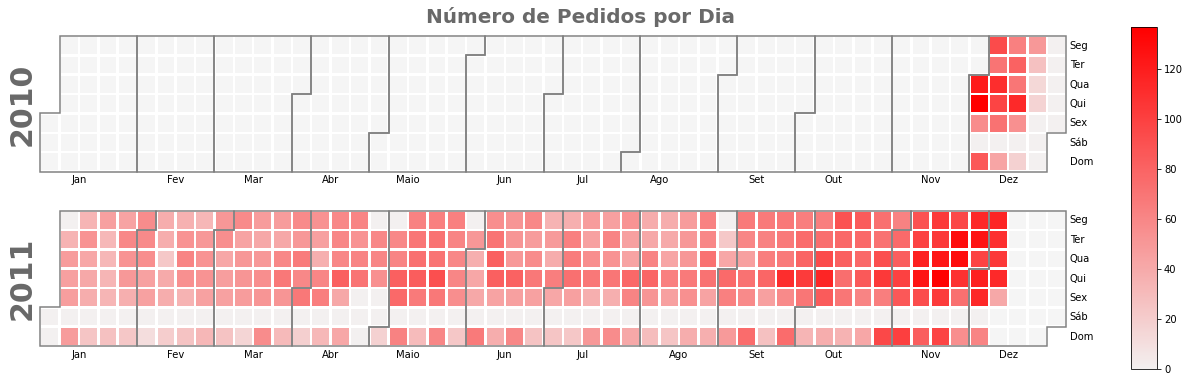

In [14]:
plot_calmap(invoice_by_date['count_invoice'],'red')

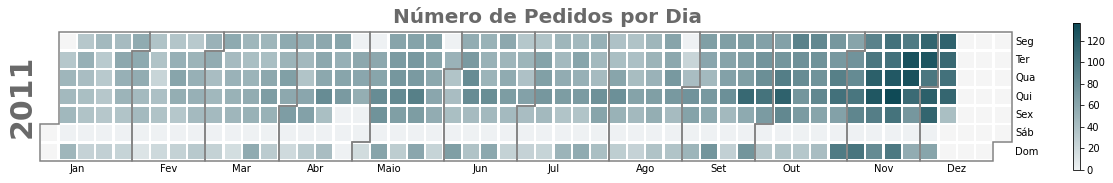

In [15]:
plot_calmap(invoice_by_date['count_invoice']['2011-01-01':'2012-01-01'],'#0f4a56',fig_size=(18,2.5))

# Referências

https://calplot.readthedocs.io/en/latest/


https://github.com/tomkwok/calplot

https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/

https://matplotlib.org/stable/tutorials/colors/colormaps.html

